# Место статистики в работе аналитика

## Описательная статистика

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings("ignore")  # бережем глаза от ненужных предупреждений

In [2]:
# Генерация случайных данных (например, данные о зарплатах)
np.random.seed(42)
data = np.random.normal(50000, 15000, 1000)  # Средняя зарплата = 50000, стандартное отклонение = 15000, размер выборки = 1000

In [3]:
# Создание DataFrame из данных
df = pd.DataFrame(data, columns=['Salary'])

In [4]:
df.head()

,Salary
0,57450.712295
1,47926.035482
2,59715.328072
3,72845.447846
4,46487.699379


In [5]:
# Среднее значение
mean_salary = np.mean(df['Salary'])
print(f"Среднее значение: {mean_salary:.2f}")

Среднее значение: 50289.98


In [6]:
# Медиана
median_salary = np.median(df['Salary'])
print(f"Медиана: {median_salary:.2f}")

Медиана: 50379.51


In [7]:
# Мода
mode_salary = df['Salary'].mode()[0]
print(f"Мода: {mode_salary:.2f}")

Мода: 1380.99


In [8]:
# Стандартное отклонение
std_dev_salary = np.std(df['Salary'])
print(f"Стандартное отклонение (зарплаты в среднем отклоняются от среднего значения на): {std_dev_salary:.2f}")

Стандартное отклонение (зарплаты в среднем отклоняются от среднего значения на): 14680.89


In [9]:
# Дисперсия
variance_salary = np.var(df['Salary'])
print(f"Дисперсия: {variance_salary:.2f}")

Дисперсия: 215528622.69


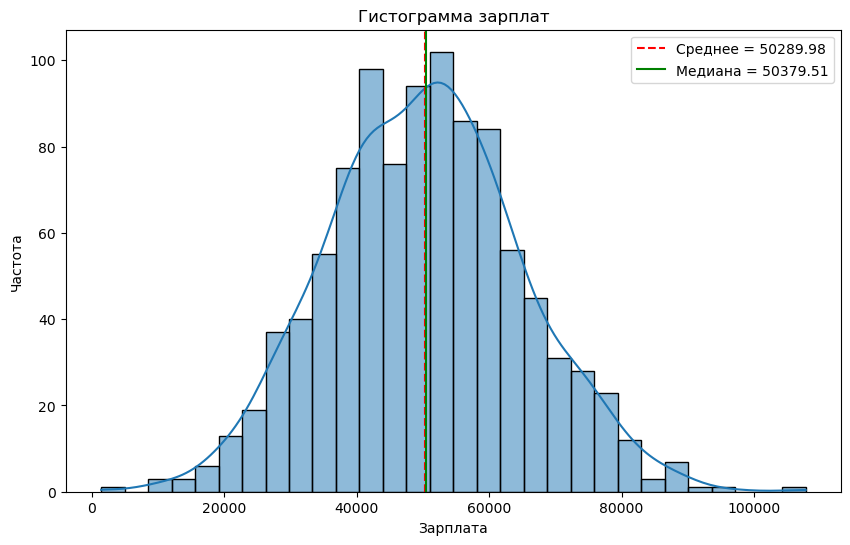

In [10]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Гистограмма зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.axvline(mean_salary, color='r', linestyle='--', label=f'Среднее = {mean_salary:.2f}')
plt.axvline(median_salary, color='g', linestyle='-', label=f'Медиана = {median_salary:.2f}')
plt.legend()
plt.show()

## Корреляционный анализ

In [11]:
# Установим случайное начальное значение для генератора случайных чисел
np.random.seed(42)

# Генерация данных
data = pd.DataFrame({
    'ad_spend': np.random.normal(100, 10, 100),  # Рекламные расходы
    'sales': np.random.normal(200, 20, 100) + np.random.normal(5, 2, 100)  # Объемы продаж
})

# Добавим немного случайных данных, чтобы увидеть больше разнообразия в корреляциях
data['profit'] = data['sales'] * 0.5 + np.random.normal(0, 10, 100)
data['cost'] = data['ad_spend'] * 0.3 + np.random.normal(0, 5, 100)

In [12]:
data.head()

,ad_spend,sales,profit,cost
0,104.967142,177.408160,80.414130,23.518004
1,98.617357,197.708663,93.252521,26.588332
2,106.476885,200.311812,107.628842,31.969284
3,115.230299,191.062059,101.634732,34.803993
4,97.658466,199.018947,99.300458,27.047213


In [13]:
# Рассчитываем матрицу корреляций
correlation_matrix = data.corr()

# Выводим матрицу корреляций
print("Матрица корреляций:")
correlation_matrix

Матрица корреляций:


,ad_spend,sales,profit,cost
ad_spend,1.000000,-0.114462,-0.201391,0.354894
sales,-0.114462,1.000000,0.728595,0.112933
profit,-0.201391,0.728595,1.000000,0.165782
cost,0.354894,0.112933,0.165782,1.000000


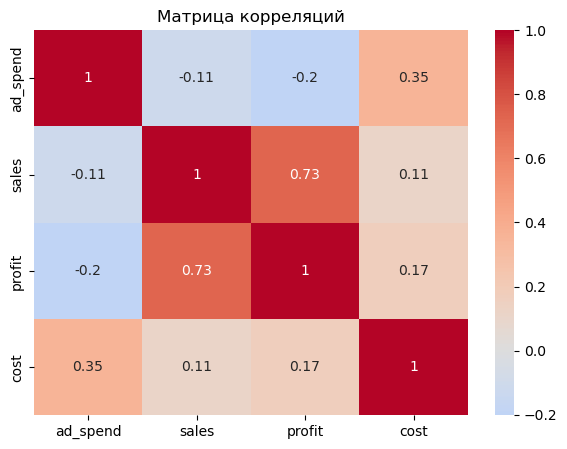

In [14]:
# Визуализация матрицы корреляций
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

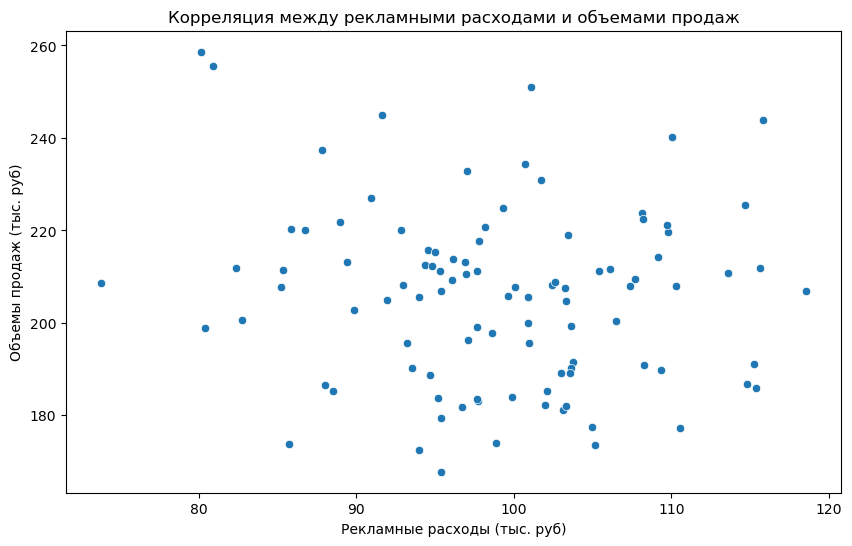

In [15]:
# Визуализация зависимости между рекламными расходами и объемами продаж
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_spend', y='sales', data=data)
plt.title('Корреляция между рекламными расходами и объемами продаж')
plt.xlabel('Рекламные расходы (тыс. руб)')
plt.ylabel('Объемы продаж (тыс. руб)')
plt.show()

Корреляция между рекламными расходами и объемами продаж: Визуализация и матрица корреляций помогают понять, как изменения в рекламных расходах влияют на объемы продаж.    
Если корреляция положительная и значительная, это может указывать на то, что увеличение рекламных расходов приводит к увеличению продаж.

## Распределения

In [16]:
# Установим случайное начальное значение для генератора случайных чисел
np.random.seed(42)

In [17]:
# Генерация данных для нормального распределения
mean = 50
std_dev = 10
normal_data = np.random.normal(mean, std_dev, 1000)

In [18]:
# Генерация данных для равномерного распределения
low = 0
high = 100
uniform_data = np.random.uniform(low, high, 1000)

In [19]:
# Генерация данных для экспоненциального распределения
scale = 1
exponential_data = np.random.exponential(scale, 1000)

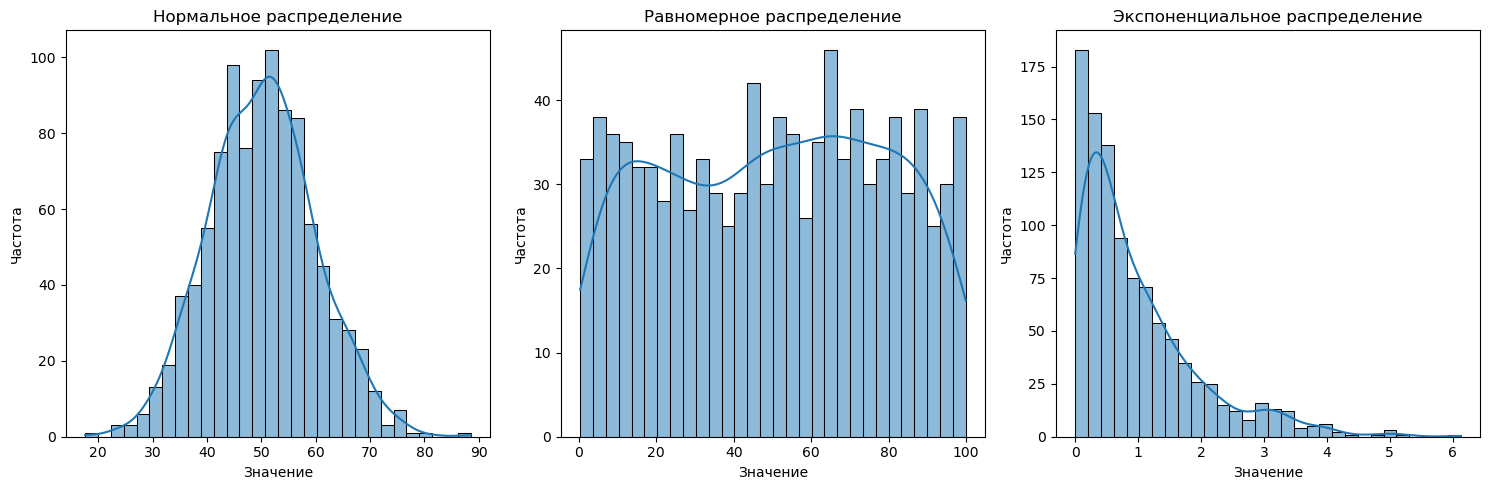

In [20]:
# Визуализация нормального распределения
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(normal_data, bins=30, kde=True)
plt.title('Нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Визуализация равномерного распределения
plt.subplot(1, 3, 2)
sns.histplot(uniform_data, bins=30, kde=True)
plt.title('Равномерное распределение')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Визуализация экспоненциального распределения
plt.subplot(1, 3, 3)
sns.histplot(exponential_data, bins=30, kde=True)
plt.title('Экспоненциальное распределение')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [21]:
# Установим случайное начальное значение для генератора случайных чисел
np.random.seed(42)

# Генерация данных для честного голосования
honest_votes = np.random.normal(loc=50, scale=10, size=100)  # Средний процент голосов = 50%, стандартное отклонение = 10%

# Генерация данных для нечестного голосования
rigged_votes = np.concatenate([
    np.random.normal(loc=50, scale=10, size=50),  # 50% участков с честными результатами
    np.random.normal(loc=90, scale=5, size=50)   # 50% участков с завышенными результатами
])

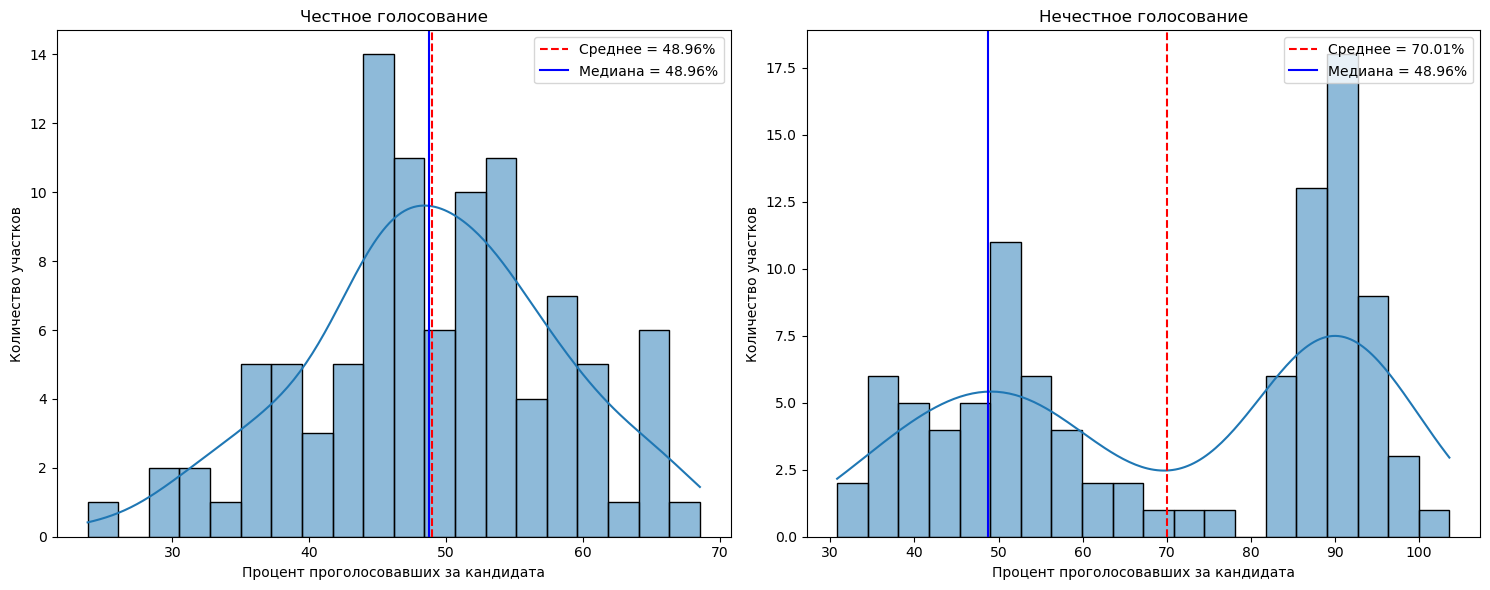

In [22]:
# Визуализация данных для честного голосования
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(honest_votes, bins=20, kde=True)
plt.title('Честное голосование')
plt.xlabel('Процент проголосовавших за кандидата')
plt.ylabel('Количество участков')
plt.axvline(np.mean(honest_votes), color='r', linestyle='--', label=f'Среднее = {np.mean(honest_votes):.2f}%')
plt.axvline(np.median(honest_votes), color='b', linestyle='-', label=f'Медиана = {np.mean(honest_votes):.2f}%')
plt.legend()

# Визуализация данных для нечестного голосования
plt.subplot(1, 2, 2)
sns.histplot(rigged_votes, bins=20, kde=True)
plt.title('Нечестное голосование')
plt.xlabel('Процент проголосовавших за кандидата')
plt.ylabel('Количество участков')
plt.axvline(np.mean(rigged_votes), color='r', linestyle='--', label=f'Среднее = {np.mean(rigged_votes):.2f}%')
plt.axvline(np.median(honest_votes), color='b', linestyle='-', label=f'Медиана = {np.mean(honest_votes):.2f}%')
plt.legend()

plt.tight_layout()
plt.show()